In [2]:
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv('Advertising.csv')
df.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2


In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
x = df[['TV', 'Radio', 'Newspaper']]

In [6]:
y = df['Sales']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=15)

In [8]:
print(x_train.shape)

(160, 3)


In [9]:
print(x_test.shape)

(40, 3)


In [10]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [12]:
LR.fit(x_train.values,y_train)

LinearRegression()

In [13]:
LR.intercept_

4.403301064986742

In [14]:
LR.coef_

array([0.05579385, 0.10182203, 0.00415545])

In [15]:
print("The LR model is: Y = ",LR.intercept_, "+", LR.coef_[0], "TV + ", LR.coef_[1], "radio + ", LR.coef_[2], "newspaper")

The LR model is: Y =  4.403301064986742 + 0.05579385181816192 TV +  0.1018220299202035 radio +  0.004155447835227227 newspaper


In [16]:
advertisment = [[120, 50, 60]]

pred = LR.predict(advertisment)
print("prediction= ", pred[0])

prediction=  16.43899164928998


In [17]:
y_pred = LR.predict(x_test.values)
y_pred

array([ 9.48014798,  9.74034749,  9.578992  ,  7.61412598,  8.9161981 ,
       18.10349948, 23.80639906,  8.45058944,  9.52481395, 14.02638709,
        5.91173779,  9.33890342, 21.63371306, 18.5788581 , 21.3716781 ,
       15.41198661, 15.90374543, 12.37618248, 20.85725333, 24.77805334,
        8.8089096 , 23.77526226,  9.57401827, 18.23968951, 18.18553619,
       13.03492642, 23.14573163,  9.20376162, 15.20778442, 18.26570686,
        6.28886805, 21.79104406,  9.8413285 , 12.11724872, 19.19663564,
       10.32455902, 11.52696495, 13.73223973, 22.41892146,  7.04160649])

<AxesSubplot: xlabel='Sales'>

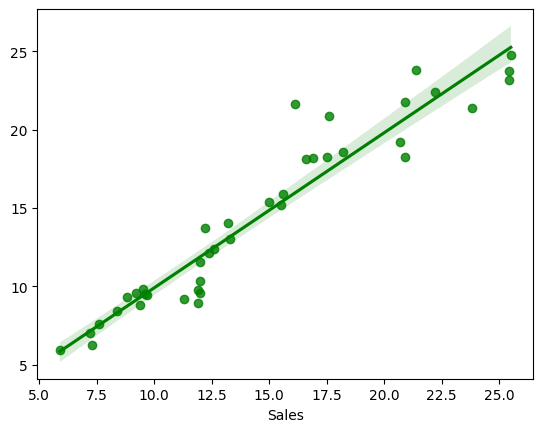

In [18]:
sns.regplot(x = y_test, y = y_pred, color='green')

In [19]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [20]:
print('mae =',mae.round(2))
print('mse =',mse.round(2))
print('rmse =',rmse.round(2))

mae = 1.17
mse = 2.71
rmse = 1.65
